In [20]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: fix this lol
%cd ..
from helpers.labellines import *
%cd analysis/

c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method
c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method\analysis


In [21]:
df = pd.read_csv("MMM.csv")

tires = ["front_left", "front_right", "rear_left", "rear_right"]

for index, row in df.iterrows():
    # see if point is saturated (i.e. all 4 tires slip angles are saturated)
    # saturation will yield to useless data point since it will wrap back around with less acceleration
    # if not saturated, the point will be saved
    # TODO: Should 1 tire even be allowed to lift???
    saturated = not False in [[row[f"{tire}_tire_is_saturated"] for tire in tires]]

    normals = [[row[f"{tire}_tire_tire_centric_forces_2"] for tire in tires]]
    two_tires_lifting = sum([1 if (tire_normal == 0) else 0 for tire_normal in normals]) > 1

    if (saturated or two_tires_lifting or abs(row["roll"]* 180/np.pi) > 3):
        df.drop(index)

Text(0.5, 1.0, 'Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)')

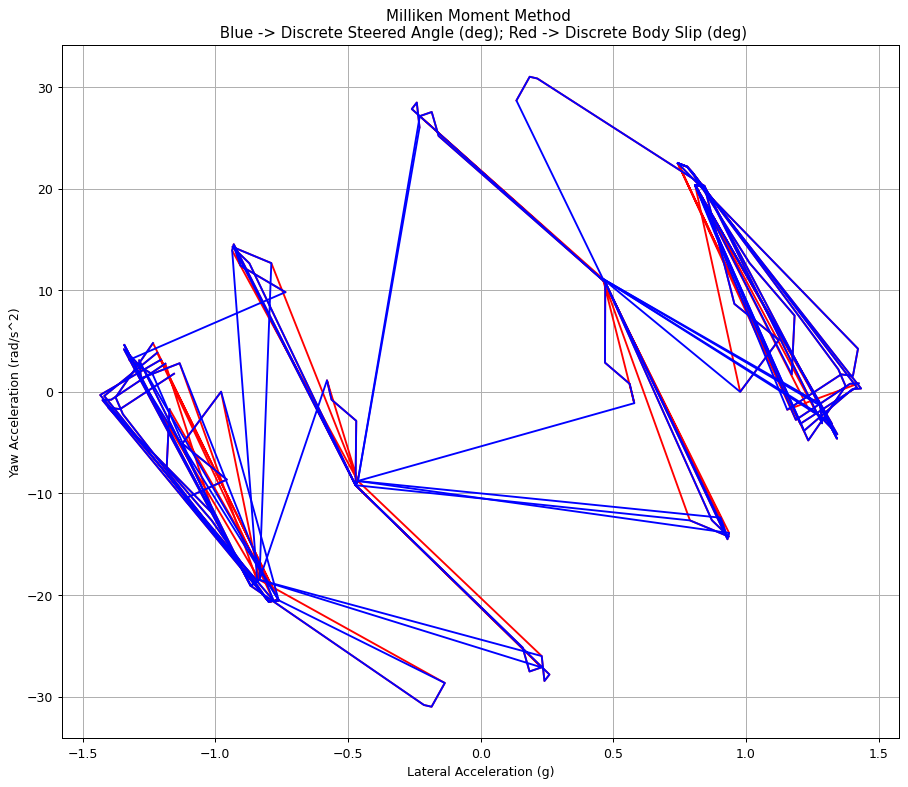

In [22]:
fig = plt.figure(figsize=(12, 10), dpi=90)
ax = fig.add_subplot(111)

for x, _ in df["body_slip"].value_counts().items():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    
    #mid_df = df2.iloc[(df2["vehicle_accelerations_NTB_1"]-df2["vehicle_accelerations_NTB_1"].mean()).abs().argsort().iloc[0]]
    plt.plot(lat_accel, yaw_accel, 'r', label = int(x*180/np.pi))
    #plt.text(mid_df["vehicle_accelerations_NTB_1"]/9.81, mid_df["yaw_acceleration"], '{0:.1f}'.format(x*180/math.pi), color = 'r')

#labelLines(plt.gca().get_lines(),zorder=2)

for x, _ in df["steered_angle"].value_counts().items():
    if True: #x == 0.0224399475256413:
        df2 = df[(df["steered_angle"] == x)]
        # for index, row in df2.iterrows():
        #     print(row["body_slip"],row["vehicle_accelerations_NTB_1"] )
        plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b', label = int(x*180/np.pi))
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")
plt.title("Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)")
#labelLines(plt.gca().get_lines(),zorder=2)

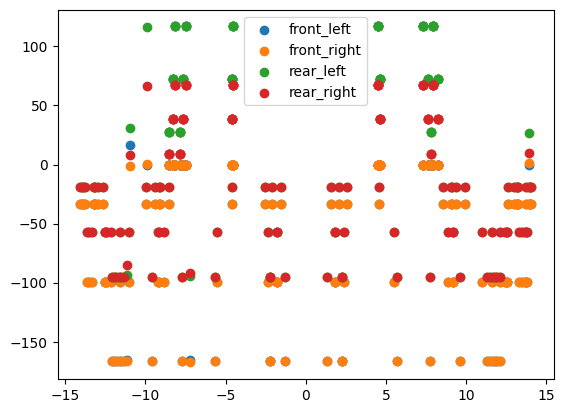

In [23]:
for tire in tires:
    plt.scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_torque"], label = tire)
plt.legend()

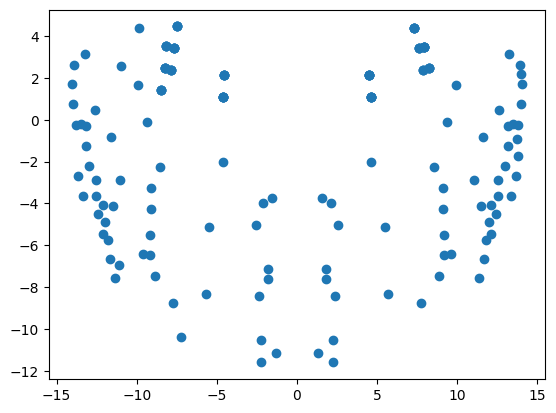

In [24]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["vehicle_accelerations_NTB_0"])

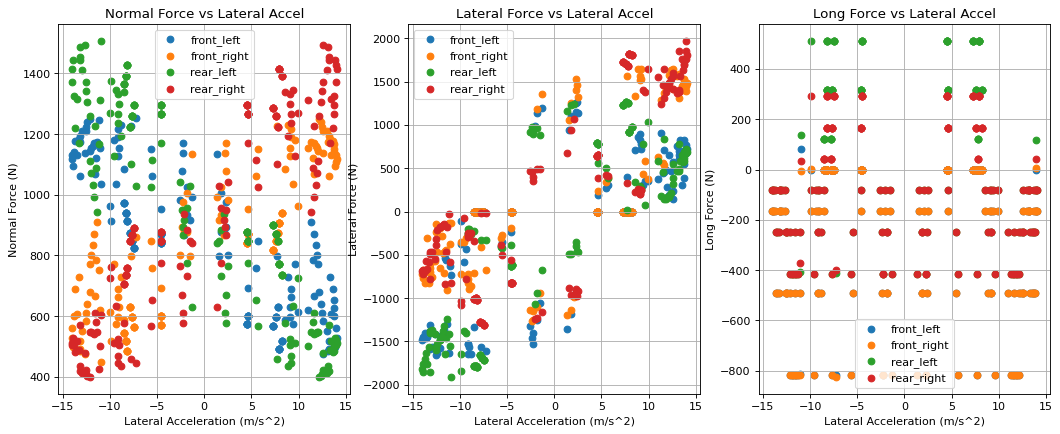

In [39]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

for tire in tires:
    axs[0].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_2"], label = tire)
axs[0].set_title("Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    axs[1].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_1"], label = tire)
axs[1].set_title("Lateral Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Lateral Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    axs[2].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_tire_centric_forces_0"], label = tire)
axs[2].set_title("Long Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Long Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

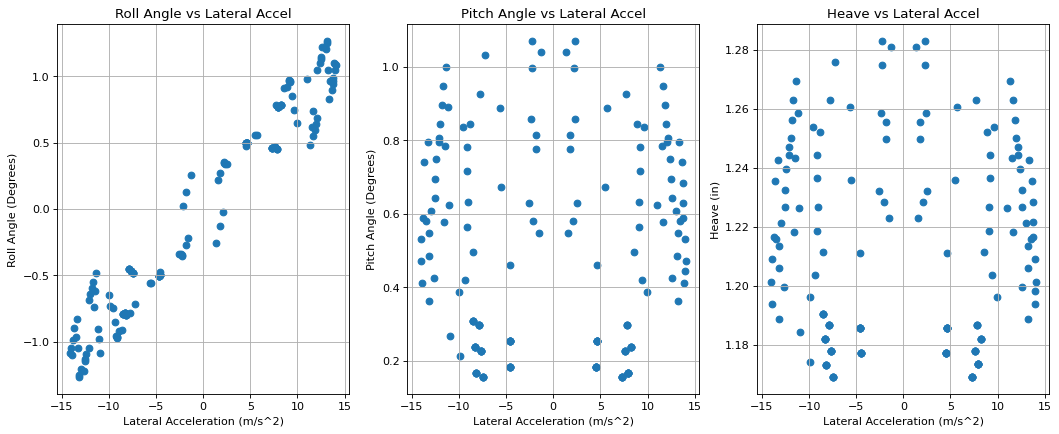

In [26]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['roll'] * (180 / np.pi))
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Roll Angle (Degrees)')
axs[0].set_title("Roll Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['pitch'] * (180 / np.pi))
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Pitch Angle (Degrees)')
axs[1].set_title("Pitch Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['heave']/.0254)
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Heave (in)')
axs[2].set_title("Heave vs Lateral Accel")
axs[2].grid()

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

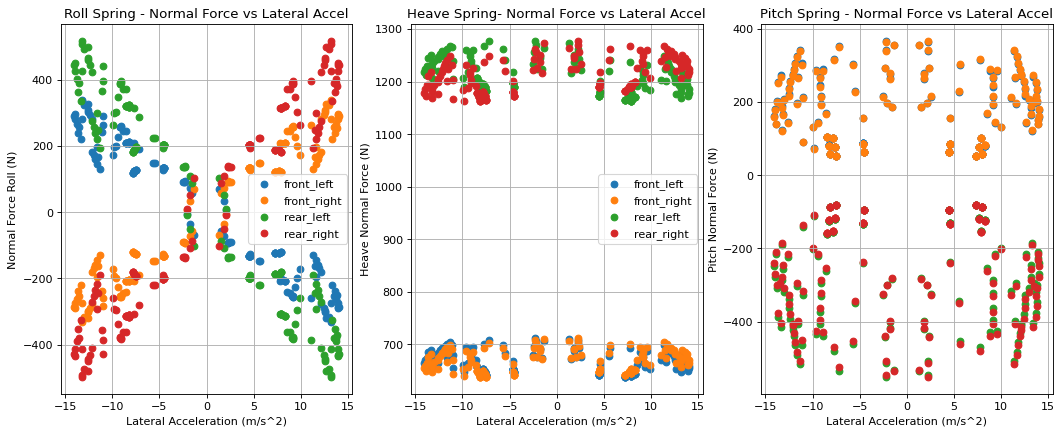

In [27]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

for tire in tires:
    axs[0].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_roll"], label = tire)
axs[0].set_title("Roll Spring - Normal Force vs Lateral Accel")
axs[0].grid()
axs[0].set_ylabel("Normal Force Roll (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    axs[1].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_heave"], label = tire)
axs[1].set_title("Heave Spring- Normal Force vs Lateral Accel")
axs[1].grid()
axs[1].set_ylabel("Heave Normal Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    axs[2].scatter(df["vehicle_accelerations_NTB_1"], df[f"{tire}_tire_f_pitch"], label = tire)
axs[2].set_title("Pitch Spring - Normal Force vs Lateral Accel")
axs[2].grid()
axs[2].set_ylabel("Pitch Normal Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")

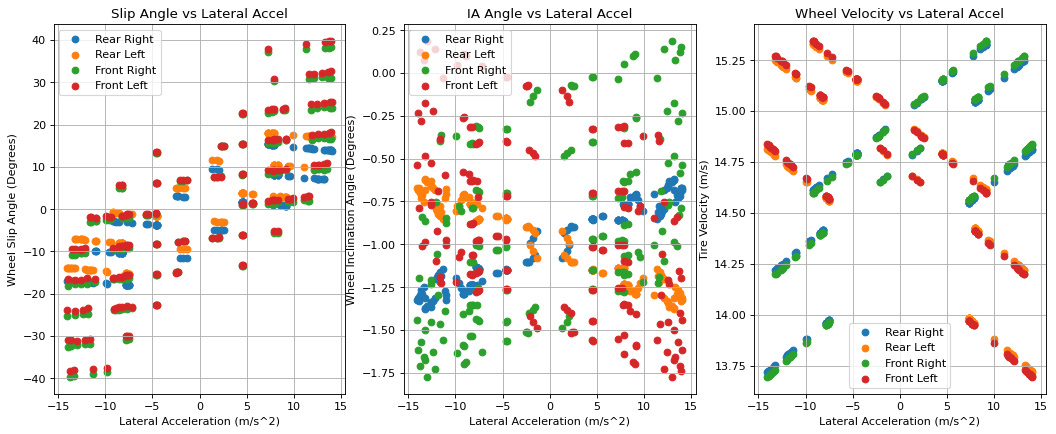

In [28]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_slip_angle'] * (180 / np.pi), label='Rear Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_slip_angle'] * (180 / np.pi), label='Rear Left')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_slip_angle'] * (180 / np.pi), label='Front Right')
axs[0].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_slip_angle'] * (180 / np.pi), label='Front Left')
axs[0].legend()
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Wheel Slip Angle (Degrees)')
axs[0].set_title("Slip Angle vs Lateral Accel")
axs[0].grid()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='Rear Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='Rear Left')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='Front Right')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='Front Left')
axs[1].legend()
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Wheel Inclination Angle (Degrees)')
axs[1].set_title("IA Angle vs Lateral Accel")
axs[1].grid()

axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_velocity_0'], label='Rear Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_velocity_0'], label='Rear Left')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_velocity_0'], label='Front Right')
axs[2].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_velocity_0'], label='Front Left')
axs[2].legend()
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Tire Velocity (m/s)')
axs[2].set_title("Wheel Velocity vs Lateral Accel")
axs[2].grid()

0.010951827063526577
0.008001492900953536


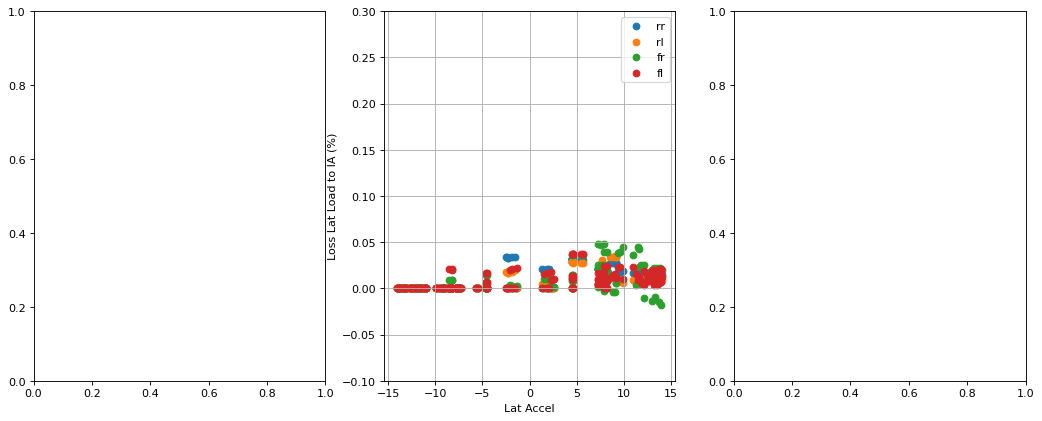

In [29]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_z_c"], label = "Front Right")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_z_c"], label = "Front Left")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_z_c"], label = "Rear Right")
# axs[0].scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_z_c"], label = "Rear Left")
# axs[0].set_title("Vertical Chassis Displacement vs Lateral Accel")
# axs[0].grid()
# axs[0].set_ylabel("Vertical Chassis Displacement (m)")
# axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
# axs[0].legend()

axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle_percent_loss'], label='rr')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle_percent_loss'], label='rl')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle_percent_loss'], label='fr')
axs[1].scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle_percent_loss'], label='fl')
axs[1].legend()
axs[1].set_xlabel('Lat Accel')
axs[1].set_ylabel('Loss Lat Load to IA (%)')
axs[1].set_ylim([-0.1,0.3])
axs[1].grid()
print(df['rear_right_tire_inclination_angle_percent_loss'].mean())
print(df['front_right_tire_inclination_angle_percent_loss'].mean())

# axs[2].scatter(df["vehicle_accelerations_NTB_1"], df["dynamics_total_inclination_angle_percent_loss"])
# axs[2].grid()
# print(df['dynamics_total_inclination_angle_percent_loss'].mean())

In [30]:
x=df[abs(df["vehicle_accelerations_NTB_1"]) == abs(df["vehicle_accelerations_NTB_1"]).max()].iloc[0]
# for name, y in x.items():
#     print(name + ": " +str(y))
# print(x["y_double_dot"]/9.81)
# print(x["yaw_acceleration"])
# print(x["front_left_f_roll"])
# print(x["front_right_f_heave"]-x["front_left_f_heave"])
# print(x["rear_right_f_heave"]-x["rear_left_f_heave"])
# print(x["roll"]*180/math.pi)
print(x["front_left_tire_vehicle_centric_forces_0"])
print(x["front_left_tire_vehicle_centric_forces_1"])
print(x["front_left_tire_vehicle_centric_forces_2"])
print(x["rear_left_tire_vehicle_centric_forces_0"])
print(x["rear_left_tire_vehicle_centric_forces_1"])
print(x["rear_left_tire_vehicle_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
# print(x["front_left_tire_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
print("Max Lateral Accel:",x["vehicle_accelerations_NTB_1"])
print("Associated Turn Radius:",x["vehicle_turn_radius"])

-256.3585415674544
-1467.6083297078517
1117.5326172132586
-51.47604255169487
-1815.3028852025304
1414.623276670569
Max Lateral Accel: -14.06358408760052
Associated Turn Radius: -15.998766644299184


Text(0.5, 1.0, 'Turn Radius vs Lateral Accel (constant velocity)')

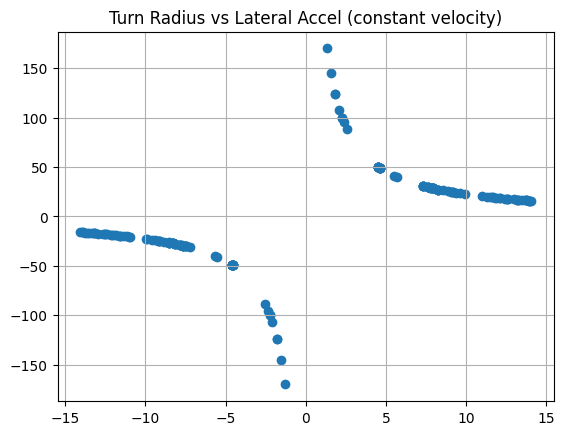

In [31]:
temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(temp_df["vehicle_accelerations_NTB_1"],temp_df["vehicle_turn_radius"])
plt.grid()
plt.title("Turn Radius vs Lateral Accel (constant velocity)")

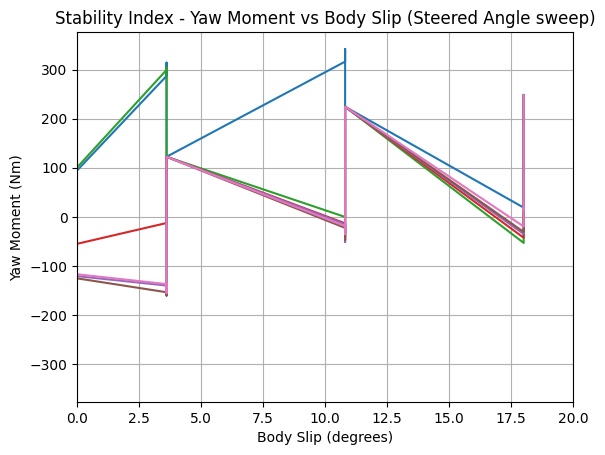

In [32]:
for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        plt.plot(df2["body_slip"] * 180/math.pi, df2["vehicle_yaw_moment"]/9.81)
plt.xlim([0, 20])
plt.title("Stability Index - Yaw Moment vs Body Slip (Steered Angle sweep)")
plt.ylabel("Yaw Moment (Nm)")
plt.xlabel("Body Slip (degrees)")
plt.grid(True)
plt.show()

c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method
c:\Users\kiera\Documents\apersonal_documents\formula\magic_moment_method\analysis


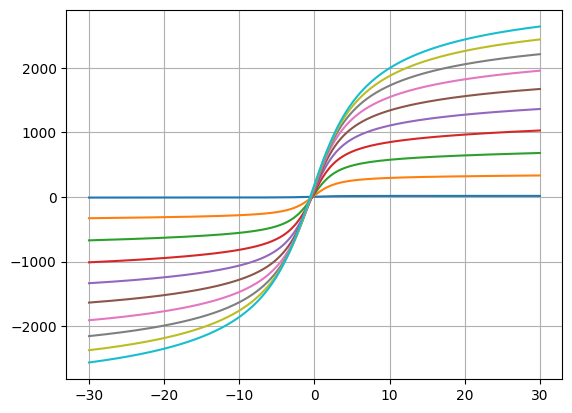

In [33]:
%cd ..
import engine
import vehicle_params
%cd analysis/
vehicle = engine.Vehicle(vehicle_params.EasyDriver())
slip_angles = np.linspace(-30, 30, 1000)
s = vehicle.suspension
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.front_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)
plt.grid()

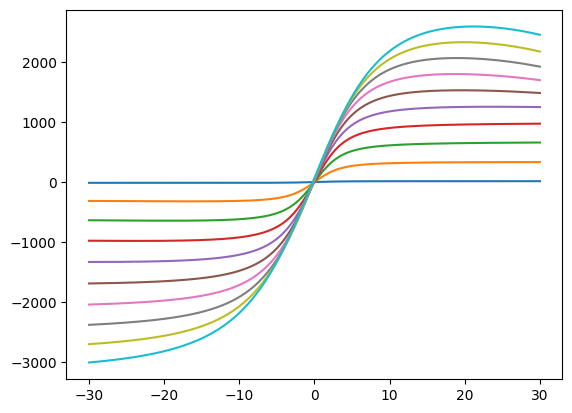

In [34]:
slip_angles = np.linspace(-30, 30, 1000)
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.rear_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)

In [35]:
#tire.comstock(slip_ratio, slip_angle, normal_force, inclination_angle)

#slip_angles = np.linspace(-30, 30, 1000)
#for slip_ratio in [0]:#[-.1, -20, -30]:
# self, SR, SA, FZ, IA
FZ = 1000
SA = 18
SR = 12
IA = 0
self = vehicle.suspension._Suspension__tires.front_right
#output_force = vehicle.suspension._Suspension__tires.front_right.comstock(12, -18, 1000,0)
FX = self.longitudinal_pacejka(FZ, SR)
FY = self.lateral_pacejka(IA, FZ, SA)
print(FX, FY)

Ca = (self.longitudinal_pacejka(FZ, 1) - self.longitudinal_pacejka(FZ, 0)) * (180 / np.pi)
Cs = (self.lateral_pacejka(0, FZ, 1) - self.lateral_pacejka(0, FZ, 0)) * 100
#     def lateral_pacejka(self, inclination_angle:float, normal_force:float, slip_angle:float):
print(Ca, Cs)
FY = FY if abs(SA) < 1 else self.com_lat(SA, SR, FX, FY, FZ, IA, Cs)
FX = FX if abs(SR) < 1 else self.com_long(SA, SR, FX, FY, FZ, Ca)
print(FX, FY)

#plt.plot(slip_angles, output_force)

-1122.2371131486618 1866.5541192826988
-12354.6066760364 153611.9898356305
208.82716072561828 1838.5401836765463


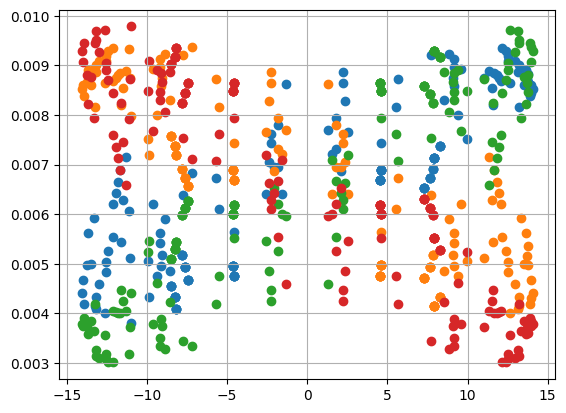

In [36]:
#temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["front_left_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_right_tire_disp"])
plt.scatter(df["vehicle_accelerations_NTB_1"],df["rear_left_tire_disp"])
plt.grid()

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

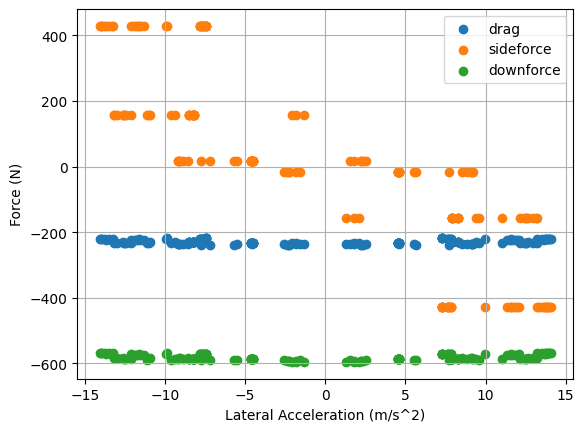

In [37]:
#temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_0"], label = "drag")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_1"], label = "sideforce")
plt.scatter(df["vehicle_accelerations_NTB_1"],df["aero_forces_2"], label = "downforce")
plt.legend()
plt.grid()
plt.ylabel("Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")

Text(0.5, 0, 'Body Slip (degs)')

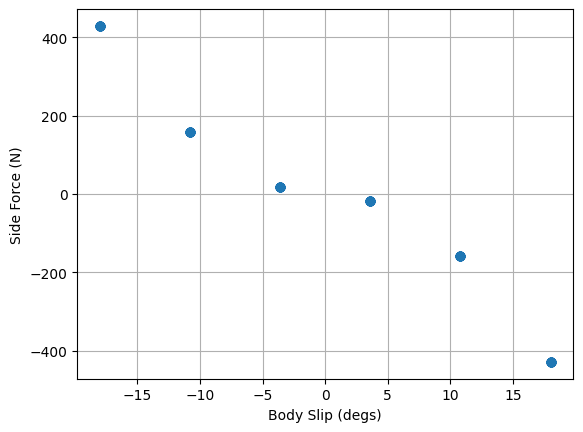

In [38]:
plt.scatter(df["body_slip"]*180/np.pi,df["aero_forces_1"], label = "sideforce")
plt.grid()
plt.ylabel("Side Force (N)")
plt.xlabel("Body Slip (degs)")